## (1) Carga de paquetes necesarios

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

## (2) Carga del DataFrame y slicing de la información

In [2]:
df = pd.DataFrame(np.load("proyecto_training_data.npy"),
                  columns=['SalePrice',
                           'OverallQual',
                           '1stFlrSF',
                           'TotRmsAbvGrd',
                           'YearBuilt',
                           'LotFrontage'])

In [3]:
entrenamiento = df.iloc[0:1168]
validacion_pruebas = df.iloc[1168:1459]

## (3) Análisis exploratorio

In [4]:
# Cálculo de medias
means = entrenamiento.mean()
print(means)

SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64


In [5]:
# Cálculo de máximos y mínimos
maximos = entrenamiento.max()
minimos = entrenamiento.min()
print(maximos)
print(minimos)

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64
SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


In [6]:
# Cálculo del rango


In [7]:
# Cálculo de la desviación estándar
de = entrenamiento.std()
print(de)

SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


## (4) Histogramas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

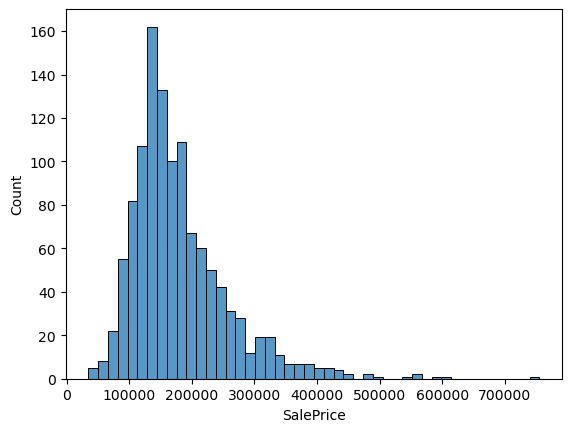

In [8]:
# Primer histrograma, precio de venta de la propiedad
sns.histplot(data = entrenamiento,
             x = 'SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

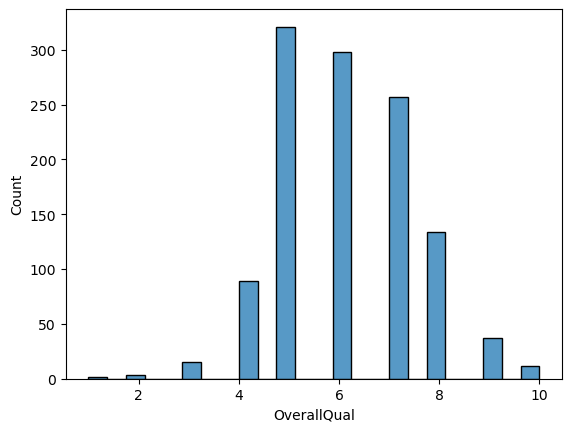

In [9]:
# Segundo histograma, calidad de la propiedad
sns.histplot(data = entrenamiento,
             x = 'OverallQual')

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

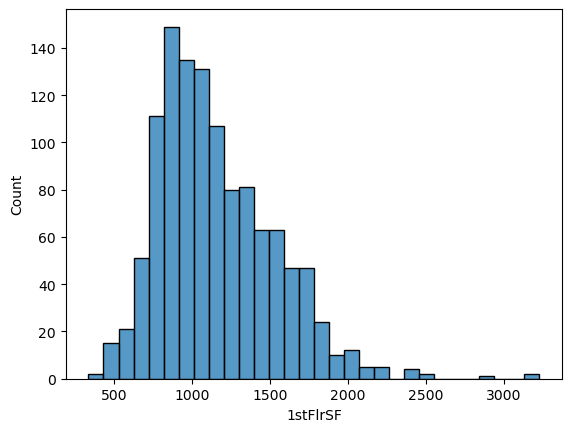

In [10]:
# Tercer histograma, área del primer piso
sns.histplot(data = entrenamiento,
             x = '1stFlrSF')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

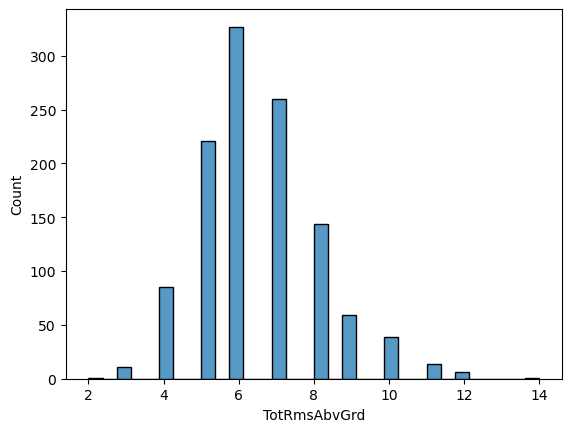

In [11]:
# Cuarto histograma, número total de habitaciones
sns.histplot(data = entrenamiento,
             x = 'TotRmsAbvGrd')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

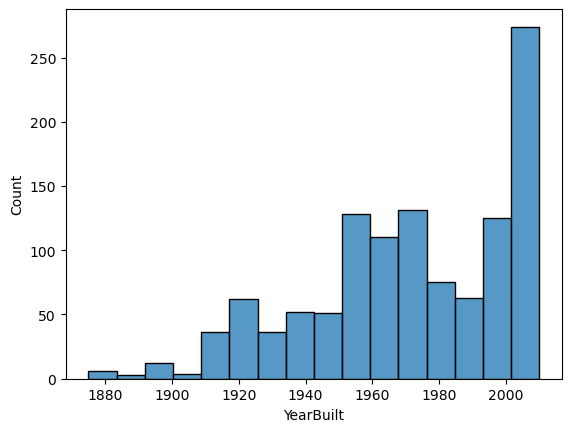

In [12]:
# Quinto histograma, año de construcción
sns.histplot(data = entrenamiento,
             x = 'YearBuilt')

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

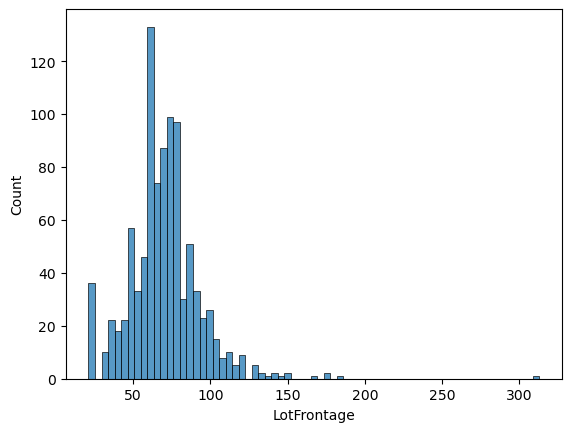

In [13]:
# Sexto histograma
sns.histplot(data = entrenamiento,
             x = 'LotFrontage')

## (5) Correlación

In [14]:
# Cálculo de la matriz de correlación
ccorr = entrenamiento.corr()
print(ccorr)

              SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
SalePrice      1.000000     0.793990  0.616289      0.564707   0.534171   
OverallQual    0.793990     1.000000  0.469411      0.444293   0.567313   
1stFlrSF       0.616289     0.469411  1.000000      0.409318   0.292074   
TotRmsAbvGrd   0.564707     0.444293  0.409318      1.000000   0.122911   
YearBuilt      0.534171     0.567313  0.292074      0.122911   1.000000   
LotFrontage    0.363292     0.242420  0.417388      0.341005   0.121474   

              LotFrontage  
SalePrice        0.363292  
OverallQual      0.242420  
1stFlrSF         0.417388  
TotRmsAbvGrd     0.341005  
YearBuilt        0.121474  
LotFrontage      1.000000  


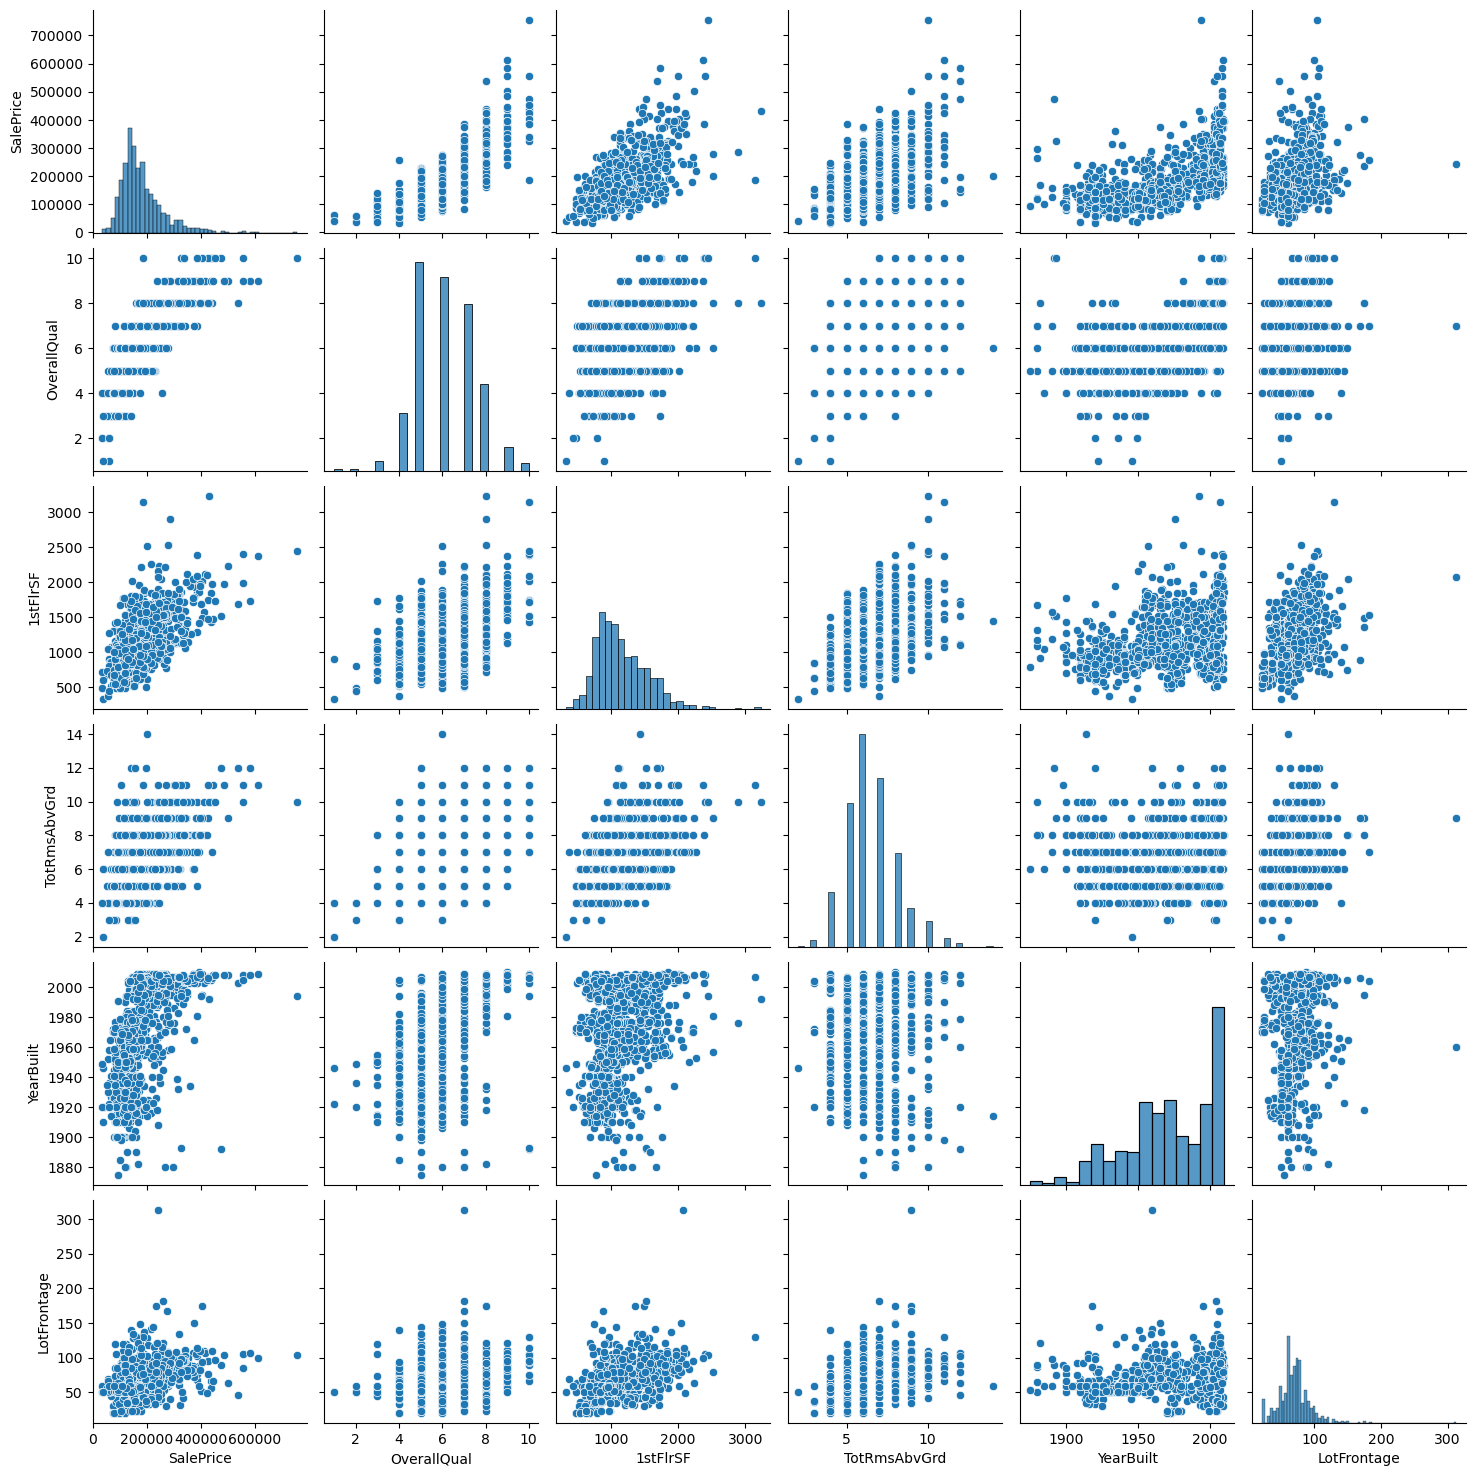

In [21]:
# Scatterplot
sns.pairplot(entrenamiento)

Al analizar la matriz de correlación y la matriz de gráficos de dispersión podemos decir que las mejores variables para la regresión lineal son SalePrice y OverallQual

## (6) Modelo de regresión lineal

In [ ]:
def reglin():